XOR는 이전에 공부했던 것 처럼 Linearly seperable 하게 못함 -> 어떻게 해결할까?!?

한개로는 해결할 수 없다. -> 여러개를 합쳐서 해결하자!! ( But 각각의 weight 과 bias 를 구할 수 없다. )

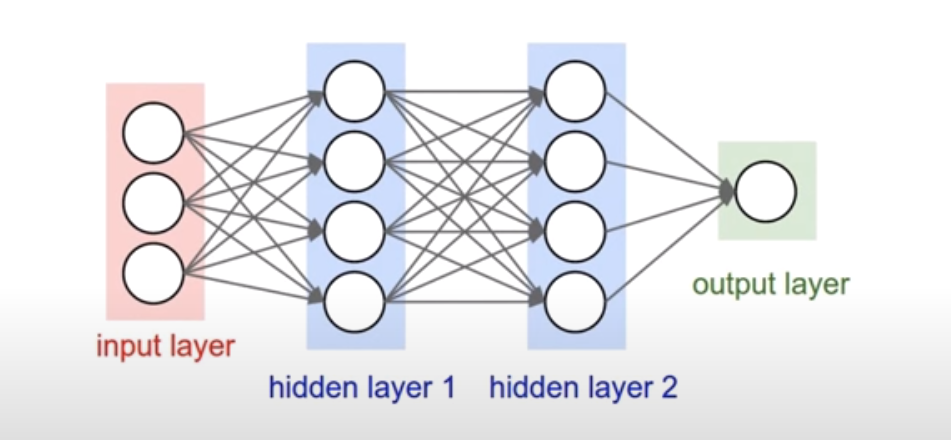




### Backpropagation

w,b를 구할 때 앞에서 조절하는 것보다 뒤에서 앞으로 전달하는 방법을 이용 하는 알고리즘!

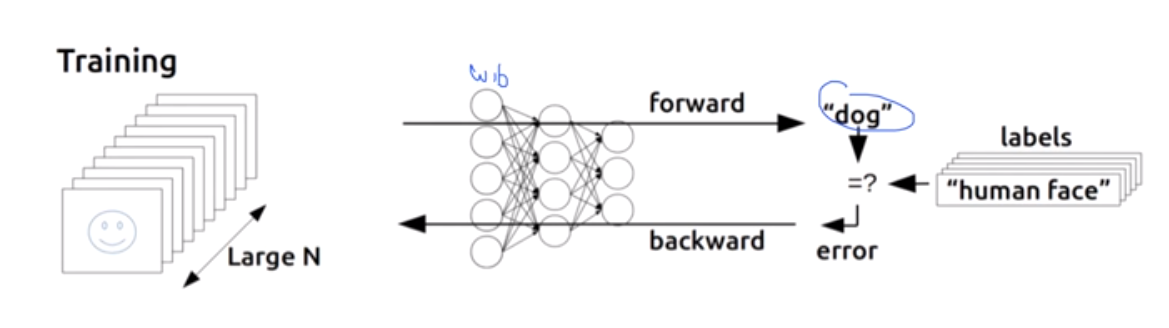

### Convultional Neural Networks

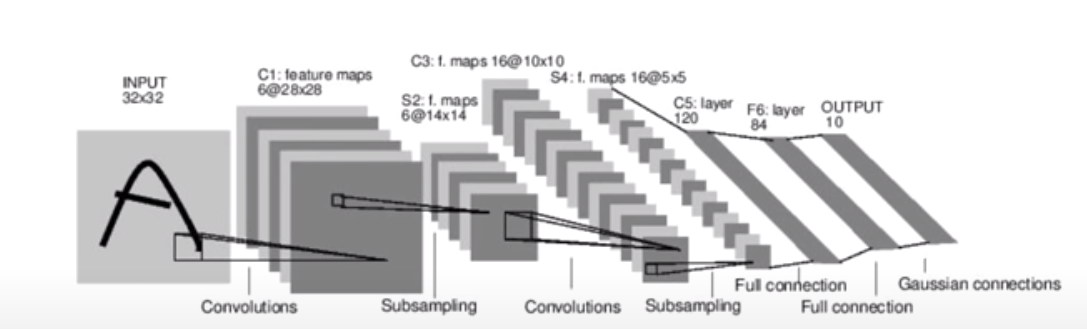

해결책으로 각각을 쪼개서 구한 뒤에 나중에 합치는 방식도 생각함


##### 문제! : (크기가 큰 경우) Backpropagtion이 사이에 있는 것이 너무 많을 경우 별 소용이 없다

# XOR 문제 딥러닝으로 풀기

한가지로는 못 풀어 (한 가지 선으로는 풀 수 없다.) -> 여러 개를 합쳐서 푼다 (위에서 설명)

간단한 예제를 보면서 여러 개를 합쳐서 푸는 과정을 보자

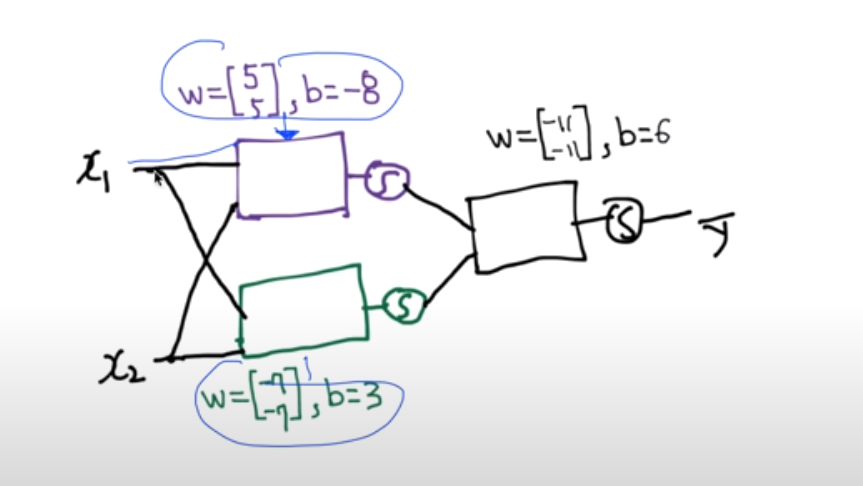

이 부분을 행렬로 한 번에 표현해보자.

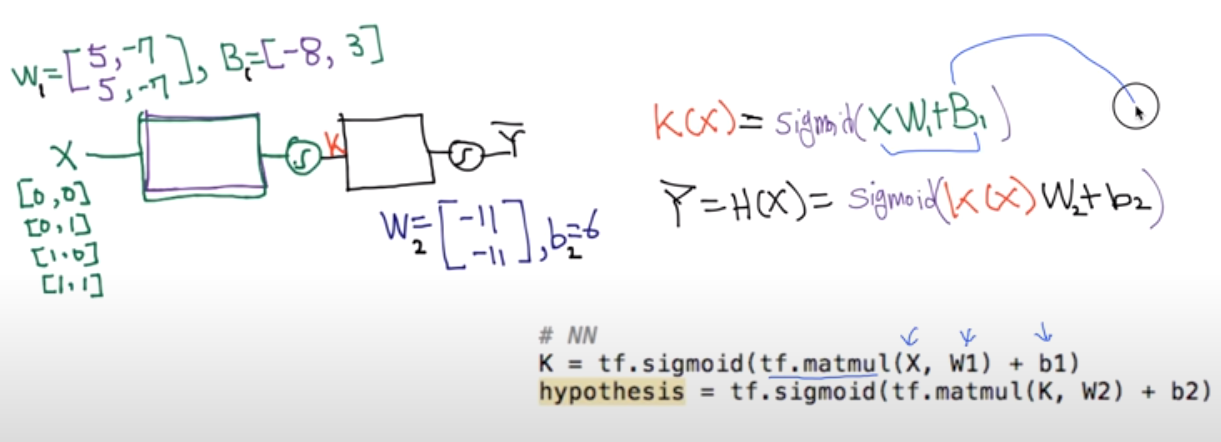

더 간단하게 표현할 수 있다.

### 어떻게 위의 식을 학습할 것인가?!!?

원래 Linear 일때는 Gradient Descent algorithm의 기울기를 구하기 편했어 -> 여러 개를 합쳐서 풀어서 기울기를 구하는 것이 노드가 많아서 계산량이 많아서 계산하기가 어려워(Minsky 교수님이 아무도 할 수 없다고 주장)

#### Backpropagation을 사용하여 해결 

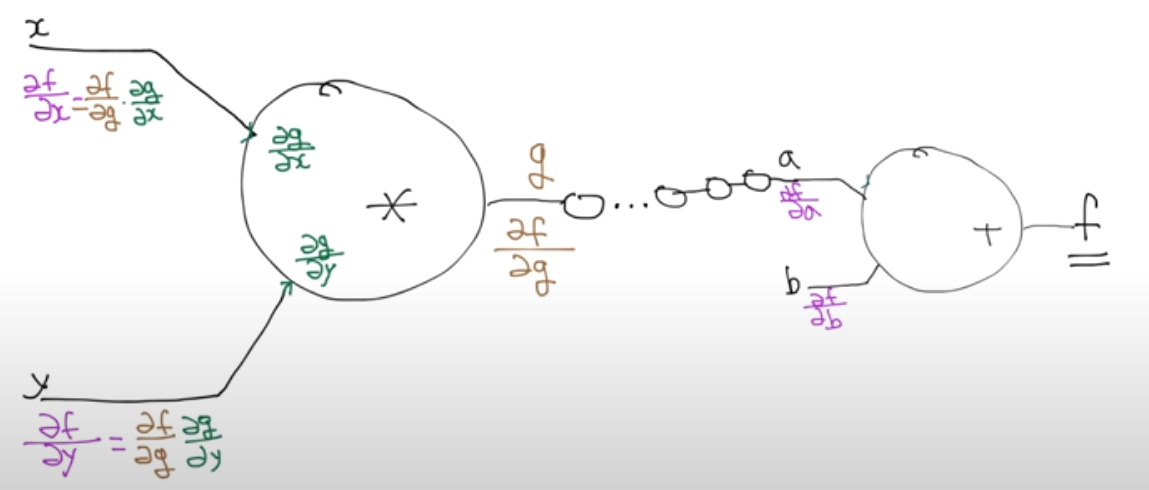

backpropagation을 사용해 뒤의 값을 이용하여 앞의 값을 구한다. (뒤 -> 앞)




# 텐서플로를 이용한 XOR 문제

In [ ]:
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()
tf.set_random_seed(777)  # for reproducibility

# xor 데이터를 입력한다.
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val, w_val = sess.run(
                  [train, cost, W], feed_dict={X: x_data, Y: y_data}
        )
        if step % 100 == 0:
            print(step, cost_val, w_val)

    # Accuracy report
    h, c, a = sess.run(
              [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

# 결과가 잘 안나옴!!!  (Accuracy 0.5)-> Neural Net 이용

In [ ]:
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 두개로 나눠서 설정하자
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

### Neural Net을 이용했을 때 더 정확한 것을 알 수 있다. ( layers 가 많을 수록 더 정확도가 높아진다.